In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [2]:
# Import data sources
raw_data = pd.read_csv("data/email_phishing_data.csv")
no_label_data = raw_data.drop('label', axis=1)
pca = PCA(n_components=2, random_state=0)

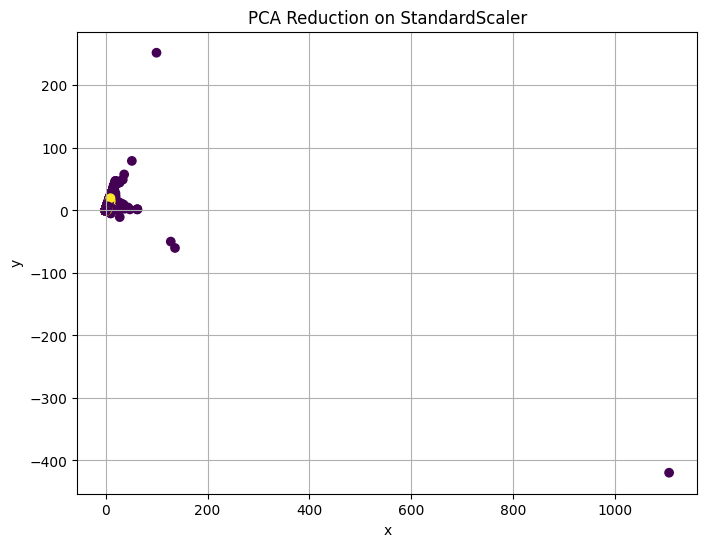

In [3]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(no_label_data), columns=no_label_data.columns)
pca_vals = pca.fit_transform(data)
# slice to make dataframe with x and y for plot, then include data label
data_pca = pd.DataFrame(data={'x':pca_vals[:, 0], 'y':pca_vals[:, 1]})
plt.figure(figsize=(8, 6))
plt.scatter(data_pca['x'], data_pca['y'], c=raw_data['label'])
plt.title('PCA Reduction on StandardScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.savefig('pca_clustering_standard.png')
plt.show()

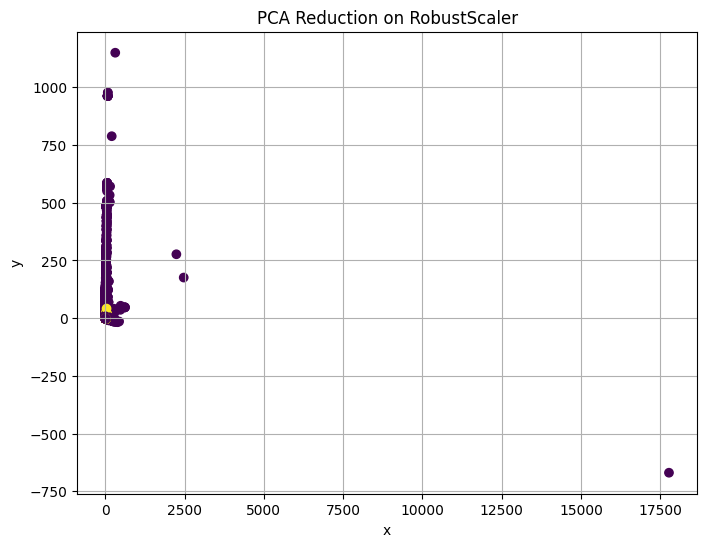

In [4]:
scaler = RobustScaler()
data = pd.DataFrame(scaler.fit_transform(no_label_data), columns=no_label_data.columns)
pca_vals = pca.fit_transform(data)
# slice to make dataframe with x and y for plot, then include data label
data_pca = pd.DataFrame(data={'x':pca_vals[:, 0], 'y':pca_vals[:, 1]})
plt.figure(figsize=(8, 6))
plt.scatter(data_pca['x'], data_pca['y'], c=raw_data['label'])
plt.title('PCA Reduction on RobustScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.savefig('pca_clustering_robust.png')
plt.show()

# Our Best Scaler

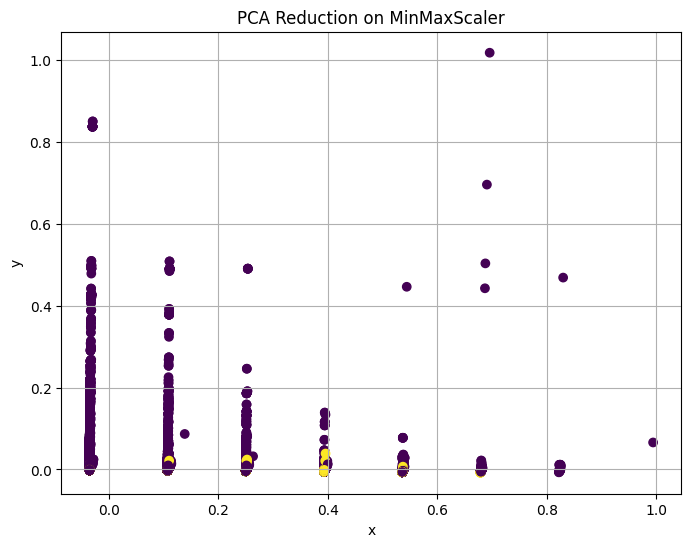

In [5]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(no_label_data), columns=no_label_data.columns)
pca_vals = pca.fit_transform(data)
data_pca = pd.DataFrame(data={'x':pca_vals[:, 0], 'y':pca_vals[:, 1]})
plt.figure(figsize=(8, 6))
plt.scatter(data_pca['x'], data_pca['y'], c=raw_data['label'])
plt.title('PCA Reduction on MinMaxScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.savefig('pca_clustering_minmax.png')
plt.show()

In [6]:
raw_data['label'].value_counts() / raw_data.shape[0]

label
0    0.98676
1    0.01324
Name: count, dtype: float64

In [7]:
raw_data.shape

(524846, 9)